In [1]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.5/616.5 kB 8.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model=YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 142MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

# Path to the uploaded dataset directory in Google Drive
src_path = '/content/drive/MyDrive/label.v2i full.yolov8'

# Destination path in Colab (root directory)
dest_path = '/content/'

# Copy the dataset directory to Colab
shutil.copytree(src_path, dest_path + 'dataset')


'/content/dataset'

In [ ]:
%cd /content/dataset


/content/dataset


In [ ]:
import os

# Print current directory
print("Current directory:", os.getcwd())


Current directory: /content/dataset


In [ ]:
%cd /content/dataset

# List contents of the directory
directory_contents = os.listdir()
print("Directory contents:", directory_contents)


/content/dataset
Directory contents: ['train', 'data.yaml', 'test', 'valid', 'README.roboflow.txt', 'README.dataset.txt']


In [ ]:
model.train(data='/content/dataset/data.yaml', epochs=60 )

Ultralytics YOLOv8.0.183 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/dataset/data.yaml, epochs=60, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optim

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e6bc0ba8040>
fitness: 0.7535908663117689
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.73127])
names: {0: '0'}
plot: True
results_dict: {'metrics/precision(B)': 0.9178159833244026, 'metrics/recall(B)': 0.9285714285714286, 'metrics/mAP50(B)': 0.9544633733380372, 'metrics/mAP50-95(B)': 0.7312716988644057, 'fitness': 0.7535908663117689}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 3.6319258601166484, 'inference': 10.53761742835821, 'loss': 0.0008843665899232376, 'postprocess': 2.7597934700721916}

In [ ]:
model_output_dir = '/content/dataset/runs/detect/train'


In [ ]:
import os

# List the contents of the train directory
directory_contents = os.listdir(model_output_dir)
print("Directory contents:", directory_contents)


Directory contents: ['val_batch1_pred.jpg', 'P_curve.png', 'PR_curve.png', 'train_batch0.jpg', 'args.yaml', 'train_batch11300.jpg', 'confusion_matrix_normalized.png', 'val_batch2_labels.jpg', 'val_batch2_pred.jpg', 'train_batch11302.jpg', 'results.csv', 'val_batch0_labels.jpg', 'train_batch2.jpg', 'train_batch11301.jpg', 'labels_correlogram.jpg', 'val_batch0_pred.jpg', 'F1_curve.png', 'weights', 'confusion_matrix.png', 'results.png', 'train_batch1.jpg', 'val_batch1_labels.jpg', 'R_curve.png', 'events.out.tfevents.1695276157.ba1703aff33b.440.0', 'labels.jpg']


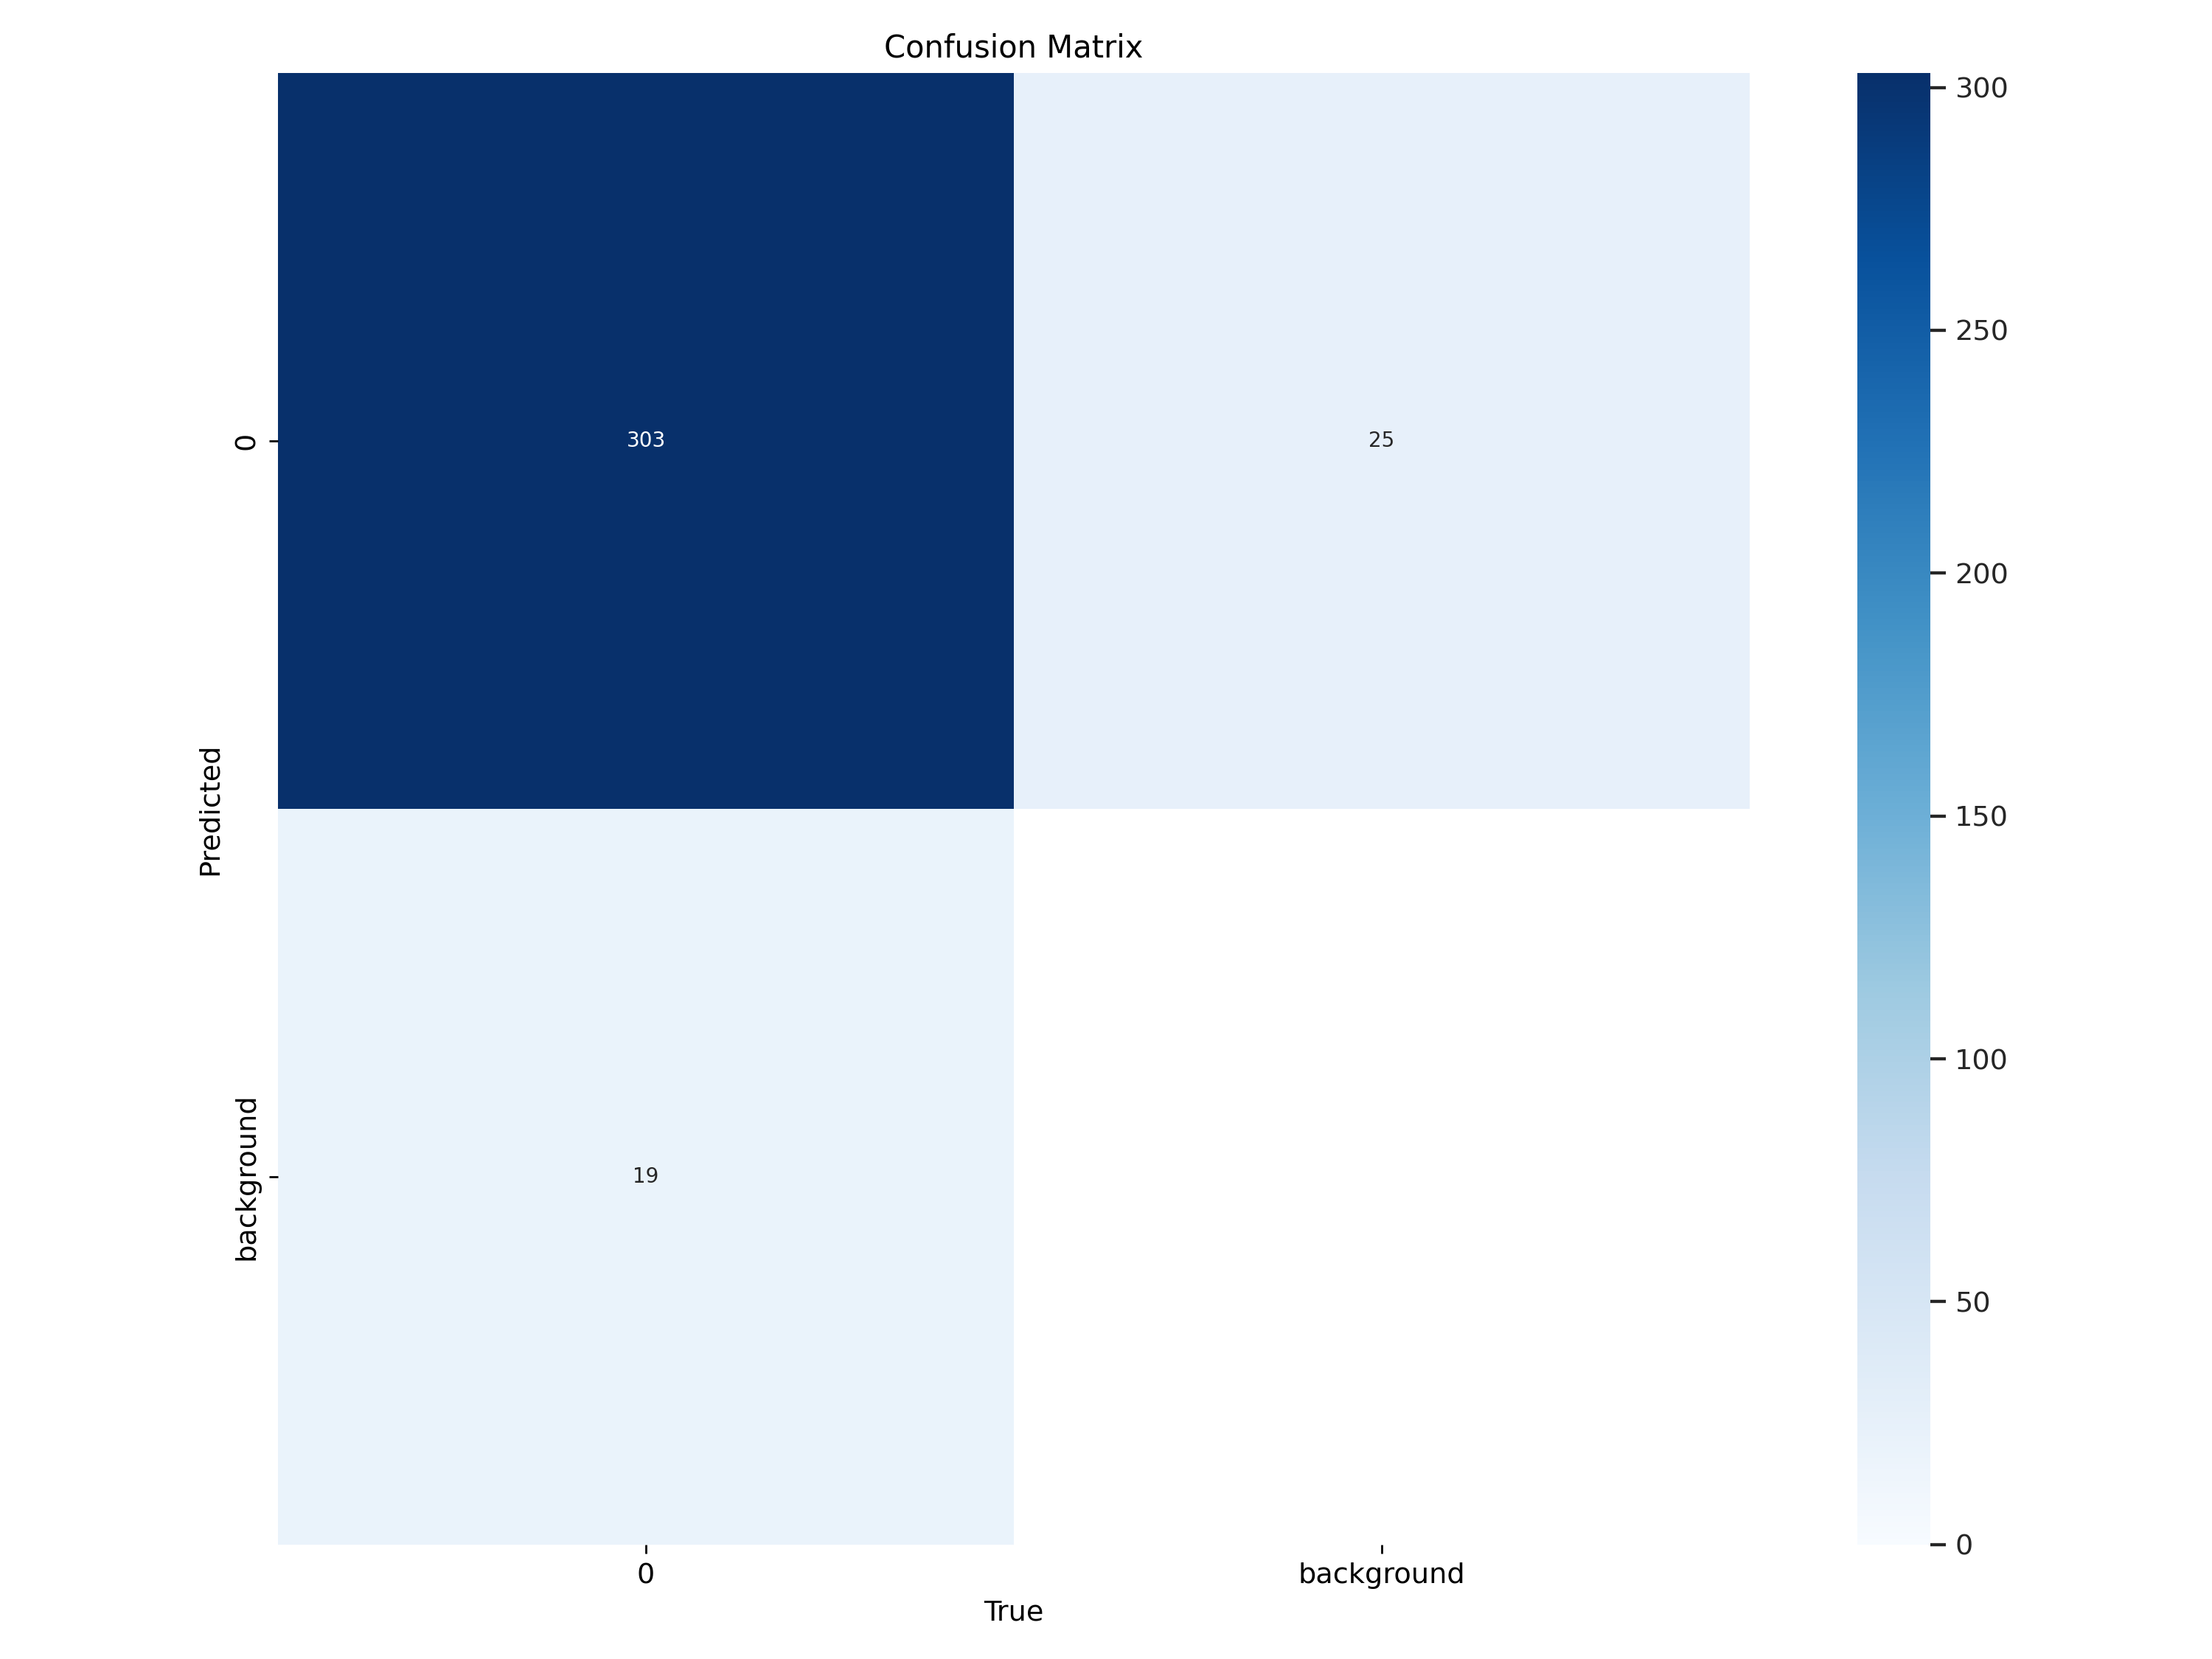

In [ ]:
from IPython.display import Image, display

# Path to the confusion matrix image
confusion_matrix_image_path = os.path.join(model_output_dir, 'confusion_matrix.png')

# Display the confusion matrix image
confusion_matrix_image = Image(filename=confusion_matrix_image_path, width=600)
display(confusion_matrix_image)


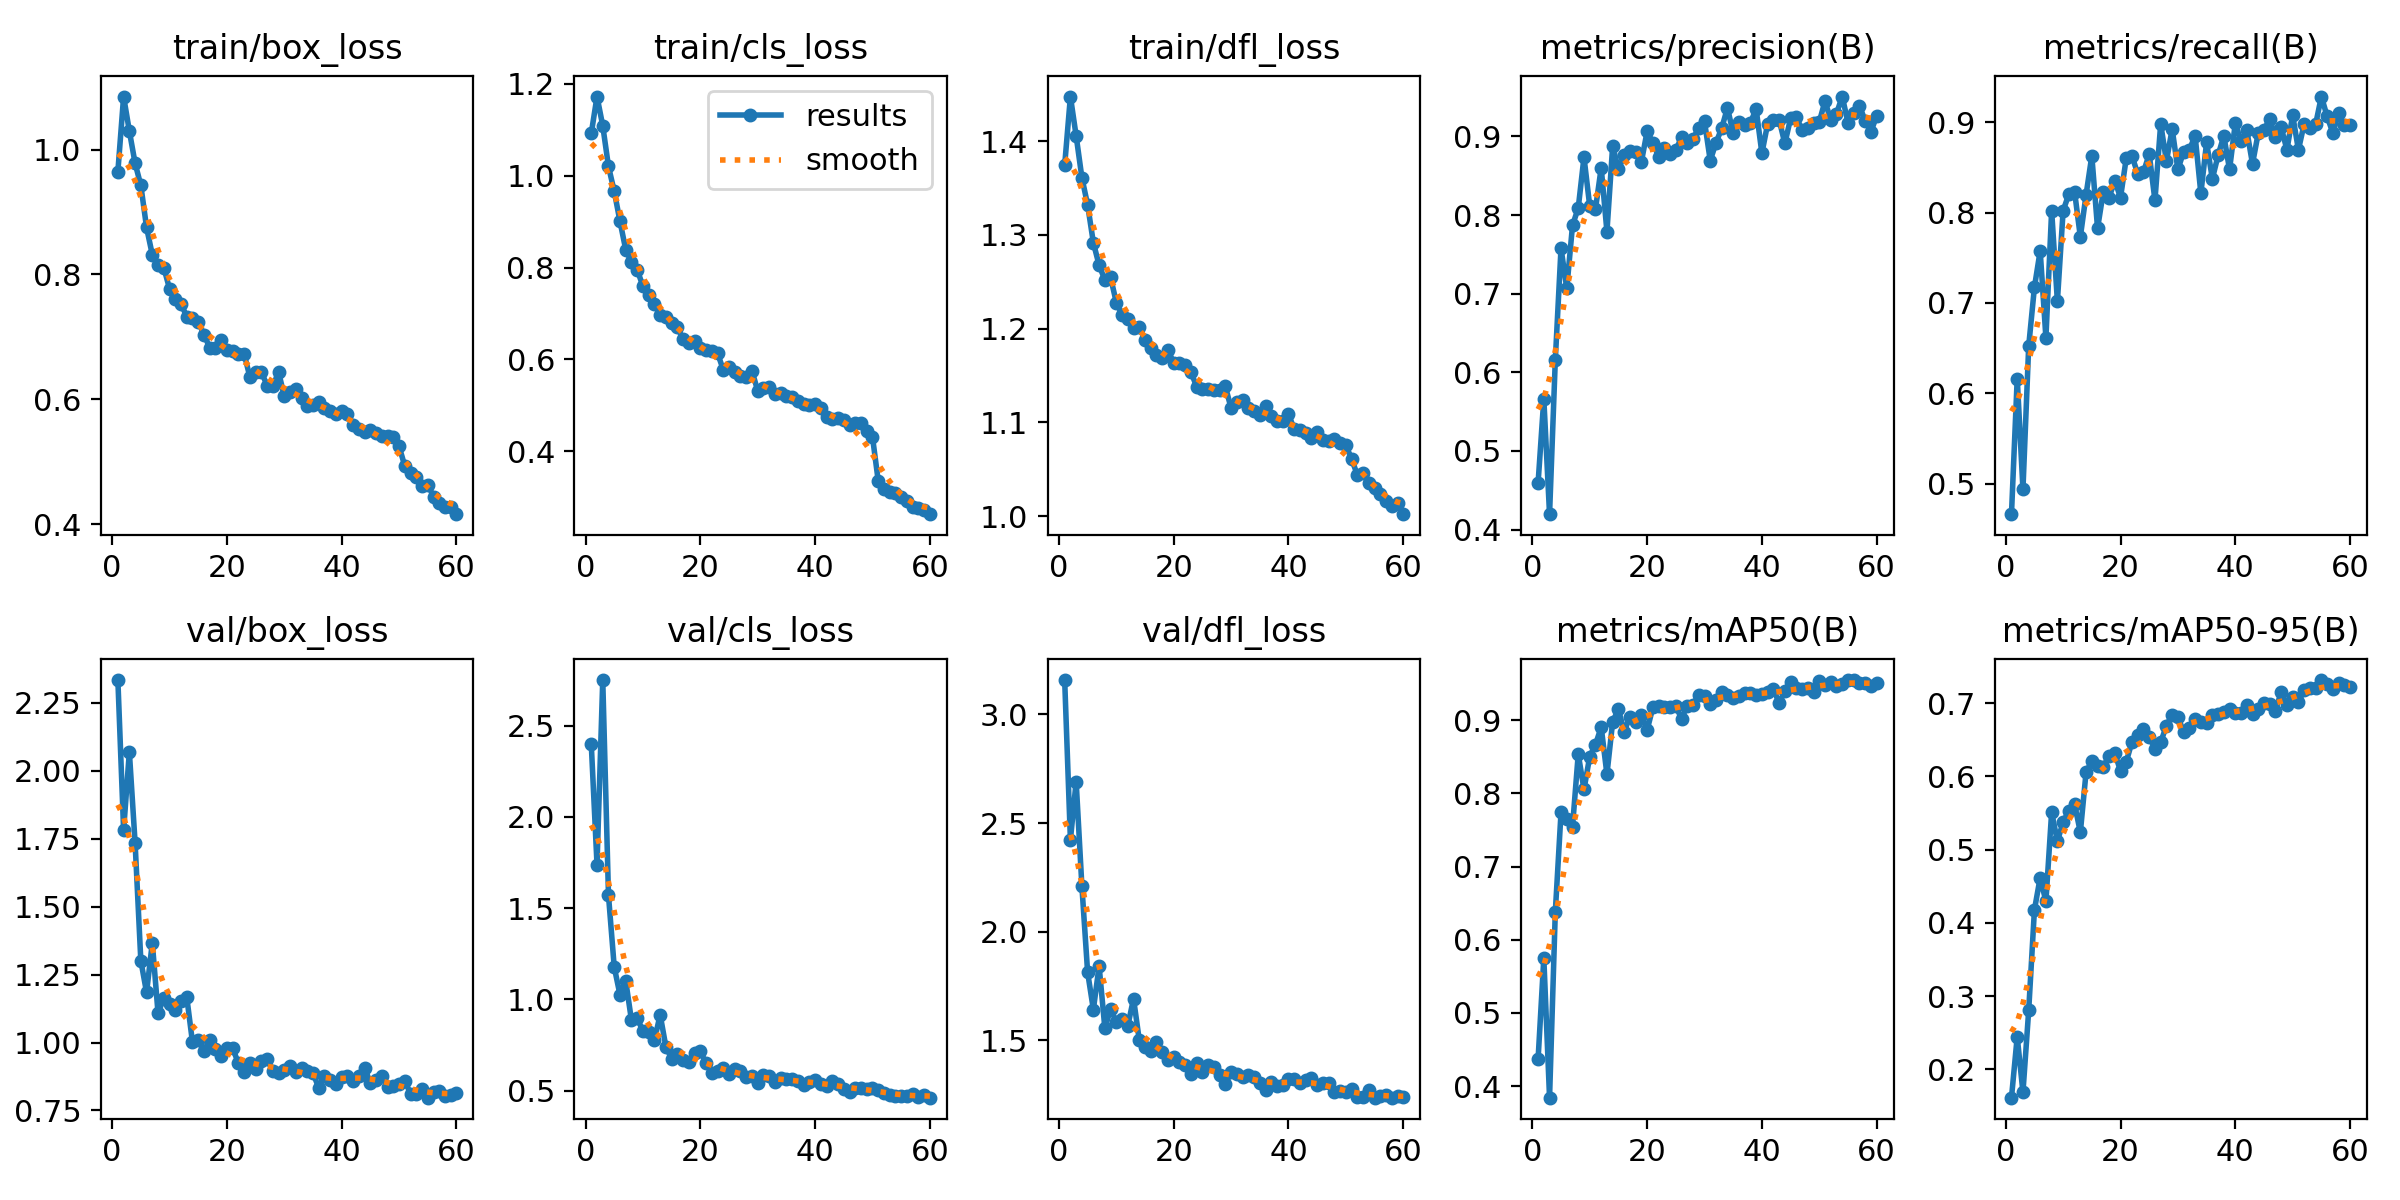

In [ ]:

# Path to the results image
results_image_path = '/content/dataset/runs/detect/train/results.png'

# Display the results image
results_image = Image(filename=results_image_path, width=800)
display(results_image)


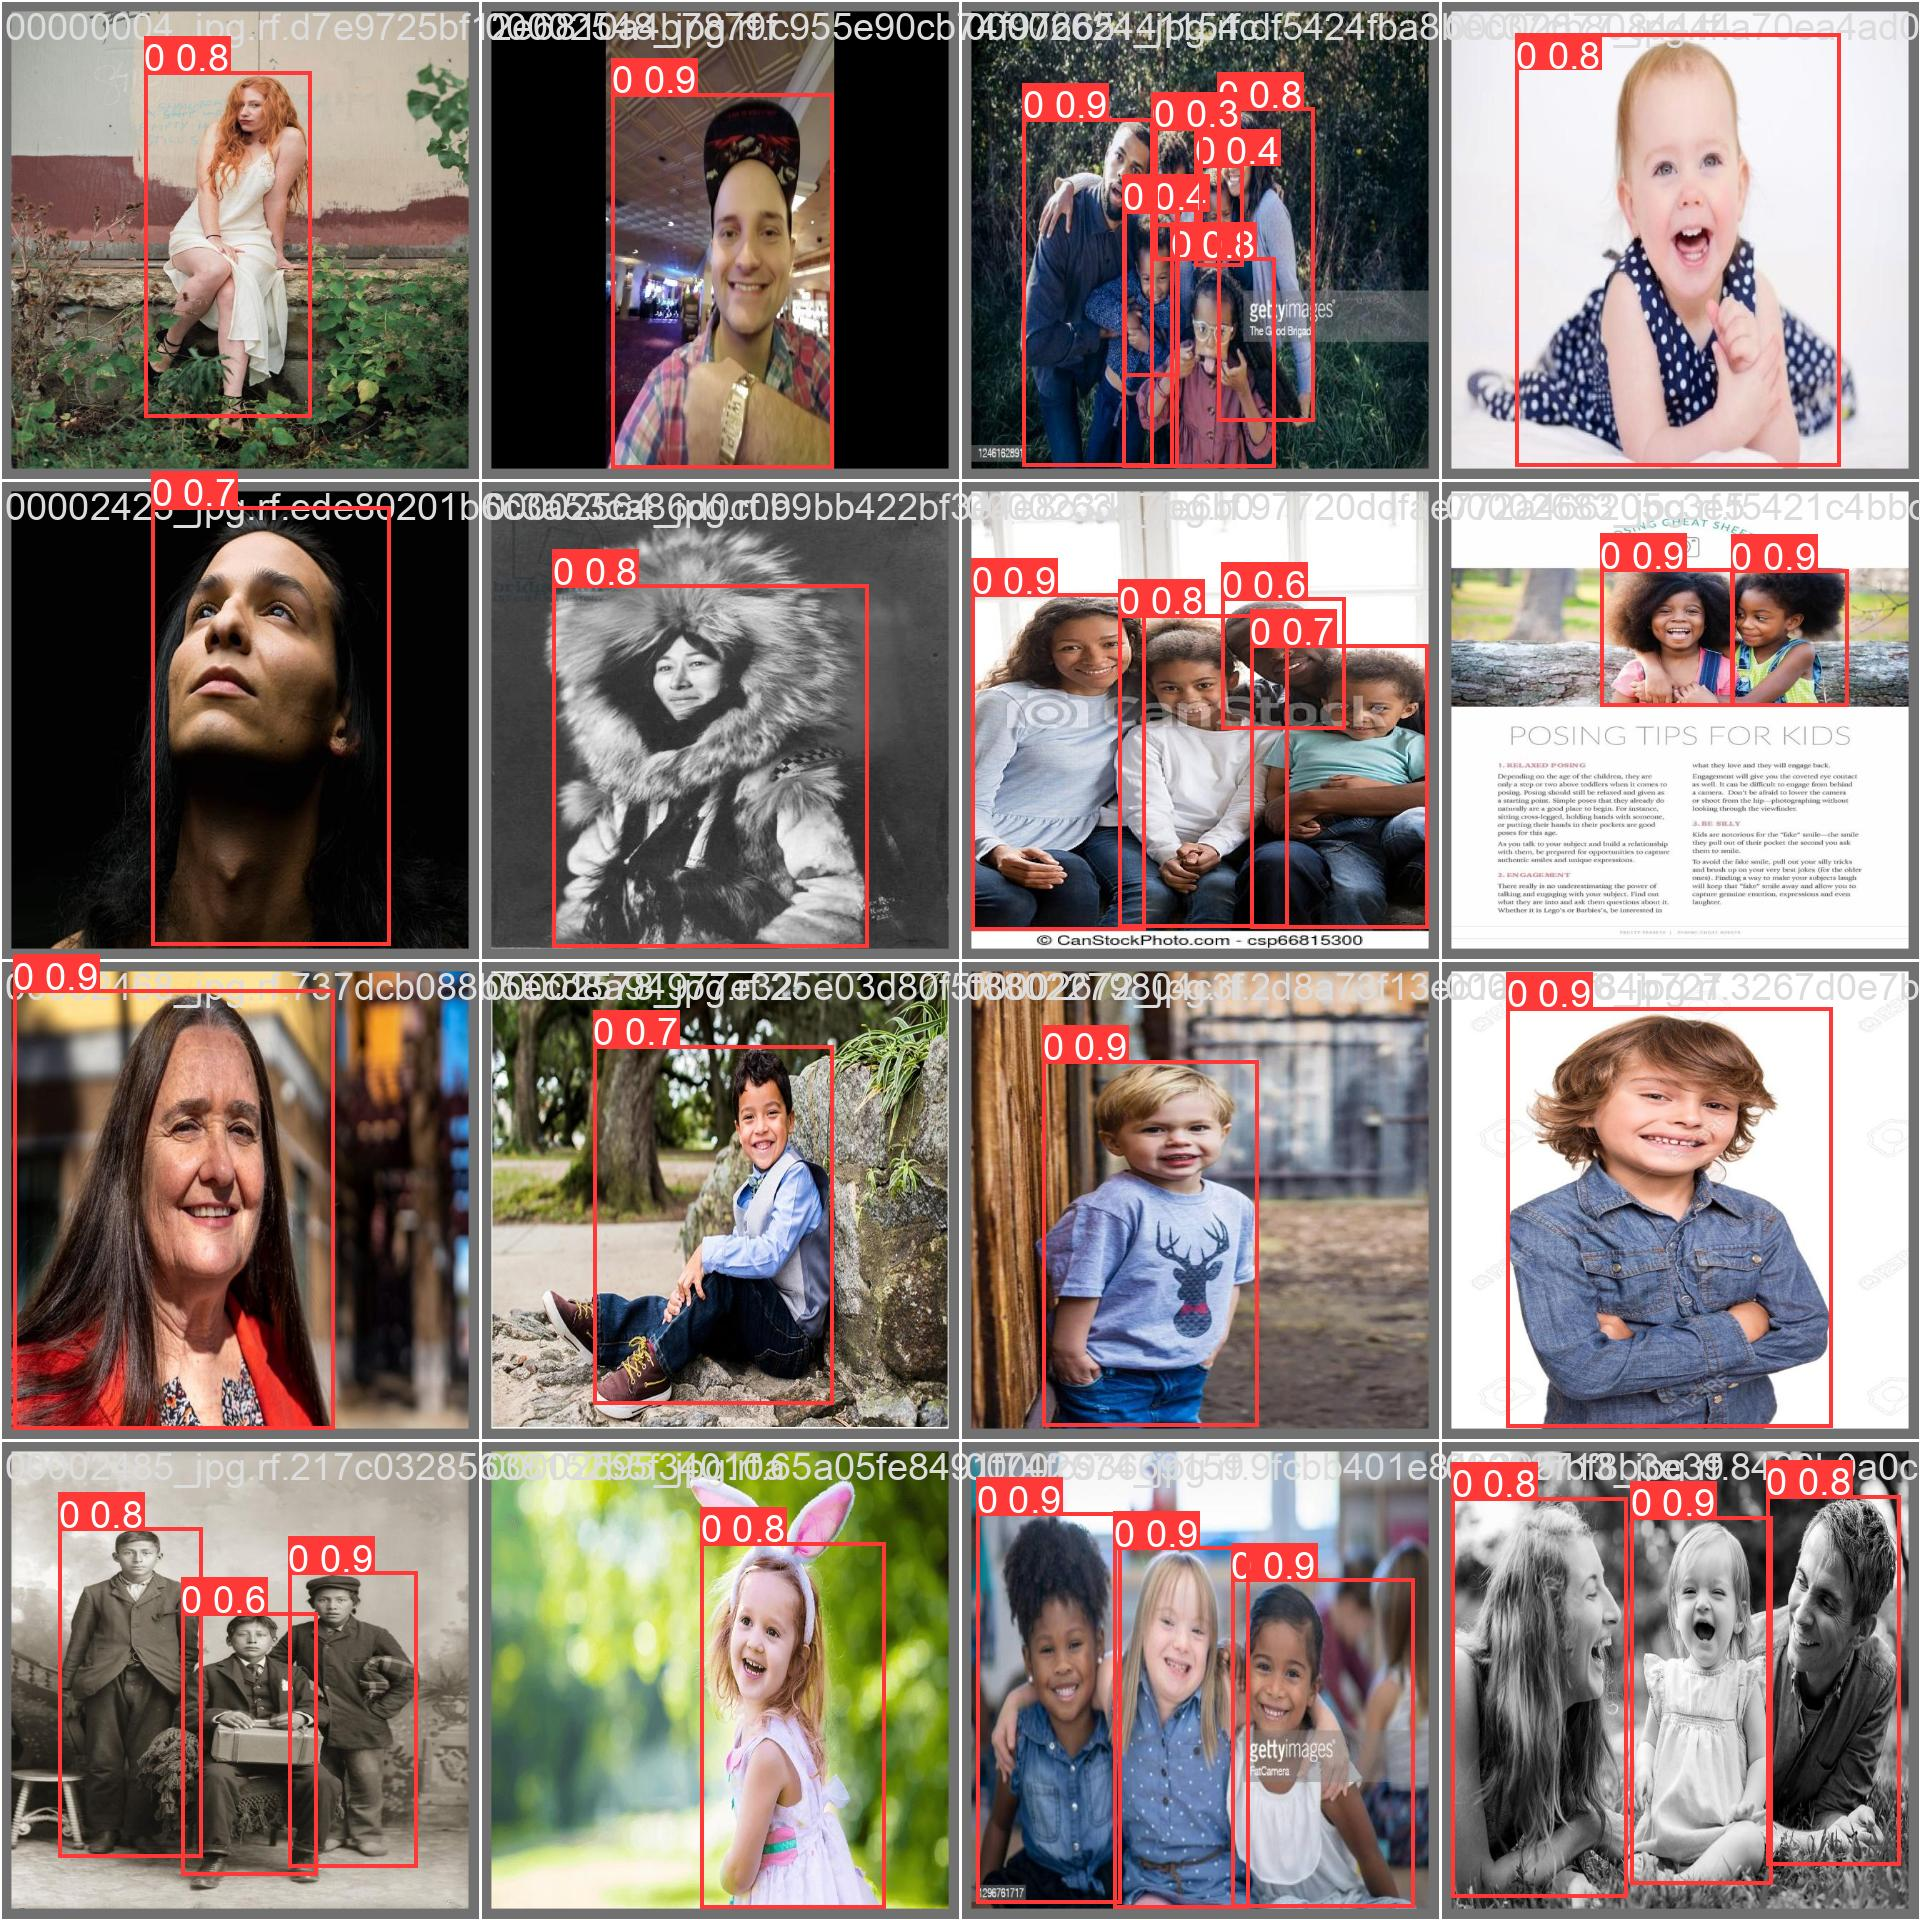

In [ ]:
results_image_path = '/content/dataset/runs/detect/train/val_batch0_pred.jpg'

# Display the results image
results_image = Image(filename=results_image_path, width=800)
display(results_image)


In [ ]:
import torch

# Load the YOLOv8 model
model = torch.load('/content/drive/MyDrive/best full human.pt')


In [ ]:
from ultralytics import YOLO
import glob
from IPython.display import Image, display

# Load the trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/best (1)_50_epochs.pt')

# Perform prediction on the images with a confidence threshold of 0.5 and save results
results_predict = model(source='/content/drive/MyDrive/unlabel', conf=0.5, save_txt=True,  save_conf=True)






WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1104 /content/drive/MyDrive/unlabel/00001820.jpg: 480x640 1 human, 103.7ms
image 2/1104 /content/drive/MyDrive/unlabel/00001821.jpg: 448x640 1 human, 114.1ms
image 3/1104 /content/drive/MyDrive/unlabel/00001822.jpg: 640x480 1 human, 110.9ms
image 4/1104 /content/drive/MyDrive/unlabel/00001823.jpg: 640x448 1 human, 63.6ms
image 5/1104 /content/drive/MyDrive/unlabel/00001824.jpg: 544x640 1 human, 81.0ms
image 6/1104 /content/drive/MyDrive/unlabel

In [ ]:
# Display the prediction results
for image_path in glob.glob('/content/runs/detect/predict/labels/*.jpg'):
    display(Image(filename=image_path, height=640))
    print("\n")

In [ ]:
!yolo task=segment mode=predict model='/content/drive/MyDrive/best (1)_50_epochs.pt' conf=0.5 source='/content/drive/MyDrive/human_detection_label.v1i.yolov8/test/images' save=True save_txt=True save_conf=True

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients

image 1/75 /content/drive/MyDrive/human_detection_label.v1i.yolov8/test/images/00000097_jpg.rf.f2360ed6de75510f6ce611b6af31ac12.jpg: 640x640 1 human, 37.0ms
image 2/75 /content/drive/MyDrive/human_detection_label.v1i.yolov8/test/images/00000119_jpg.rf.0bbcacef60857421122ae271bce50667.jpg: 640x640 1 human, 37.0ms
image 3/75 /content/drive/MyDrive/human_detection_label.v1i.yolov8/test/images/00000255_jpg.rf.257e2fe9505e1c1b56192af5c53cde58.jpg: 640x640 2 humans, 37.1ms
image 4/75 /content/drive/MyDrive/human_detection_label.v1i.yolov8/test/images/00000364_jpg.rf.cef257281254f8d5ec21f07ee77b363c.jpg: 640x640 1 human, 37.1ms
image 5/75 /content/drive/MyDrive/human_detection_label.v1i.yolov8/test/i

In [1]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!zip -r labels.zip /content/runs/detect/predict/labels

  adding: content/runs/detect/predict/labels/ (stored 0%)
  adding: content/runs/detect/predict/labels/00002486.txt (deflated 11%)
  adding: content/runs/detect/predict/labels/00002603.txt (deflated 52%)
  adding: content/runs/detect/predict/labels/00003121.txt (deflated 49%)
  adding: content/runs/detect/predict/labels/00002144.txt (deflated 11%)
  adding: content/runs/detect/predict/labels/00003049.txt (deflated 43%)
  adding: content/runs/detect/predict/labels/00002440.txt (deflated 34%)
  adding: content/runs/detect/predict/labels/00003151.txt (deflated 41%)
  adding: content/runs/detect/predict/labels/00002808.txt (deflated 9%)
  adding: content/runs/detect/predict/labels/00003056.txt (deflated 34%)
  adding: content/runs/detect/predict/labels/00002919.txt (deflated 50%)
  adding: content/runs/detect/predict/labels/00003036.txt (deflated 11%)
  adding: content/runs/detect/predict/labels/00002057.txt (deflated 13%)
  adding: content/runs/detect/predict/labels/00002010.txt (deflated

In [ ]:
from google.colab import files
files.download('labels.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
best_weights_path = '/content/dataset/runs/detect/train7/weights/best.pt'
data_yaml_path = '/content/dataset/data.yaml'

In [ ]:
import subprocess

# Define the paths
model_path = f"/content/dataset/runs/detect/train/weights/best.pt"
source_path = f"/content/dataset/test/images"

# Define the command as a list of strings
command = [
    'yolo',
    'task=detect',
    'mode=predict',
    f'model={model_path}',
    'conf=0.25',
    f'source={source_path}',
    'save=True'
]

# Convert the command list to a single string
command_string = ' '.join(command)

# Execute the command using subprocess
subprocess.run(command_string, shell=True)


CompletedProcess(args='yolo task=detect mode=predict model=/content/dataset/runs/detect/train/weights/best.pt conf=0.25 source=/content/dataset/test/images save=True', returncode=0)

In [ ]:
import json
config = {
    'data_config': '/content/dataset/data.yaml',
    'model_architecture': 'yolov8m.pt',
    'training_params': {
        'epochs': 25
    }
}

# Save the updated config to the JSON file
config_path = '/content/drive/MyDrive/trained_yolov8_config.json'
print("Saving config to:", config_path)
with open(config_path, 'w') as config_file:
    json.dump(config, config_file)
print("Config saved successfully.")


Saving config to: /content/drive/MyDrive/trained_yolov8_config.json
Config saved successfully.


In [ ]:
import torch

# Load the YOLOv8 model
model = torch.load('/content/drive/MyDrive/best full human.pt')


In [ ]:
from ultralytics import YOLO

# Load your model
model = YOLO('/content/drive/MyDrive/best full human.pt')

# Print the architecture and layer details
for name, param in model.named_parameters():
    print(f"Layer: {name}, Size: {param.size()}")


Layer: model.model.0.conv.weight, Size: torch.Size([48, 3, 3, 3])
Layer: model.model.0.bn.weight, Size: torch.Size([48])
Layer: model.model.0.bn.bias, Size: torch.Size([48])
Layer: model.model.1.conv.weight, Size: torch.Size([96, 48, 3, 3])
Layer: model.model.1.bn.weight, Size: torch.Size([96])
Layer: model.model.1.bn.bias, Size: torch.Size([96])
Layer: model.model.2.cv1.conv.weight, Size: torch.Size([96, 96, 1, 1])
Layer: model.model.2.cv1.bn.weight, Size: torch.Size([96])
Layer: model.model.2.cv1.bn.bias, Size: torch.Size([96])
Layer: model.model.2.cv2.conv.weight, Size: torch.Size([96, 192, 1, 1])
Layer: model.model.2.cv2.bn.weight, Size: torch.Size([96])
Layer: model.model.2.cv2.bn.bias, Size: torch.Size([96])
Layer: model.model.2.m.0.cv1.conv.weight, Size: torch.Size([48, 48, 3, 3])
Layer: model.model.2.m.0.cv1.bn.weight, Size: torch.Size([48])
Layer: model.model.2.m.0.cv1.bn.bias, Size: torch.Size([48])
Layer: model.model.2.m.0.cv2.conv.weight, Size: torch.Size([48, 48, 3, 3])
La